Plotting: 648it [01:39,  6.49it/s]


KeyboardInterrupt: 

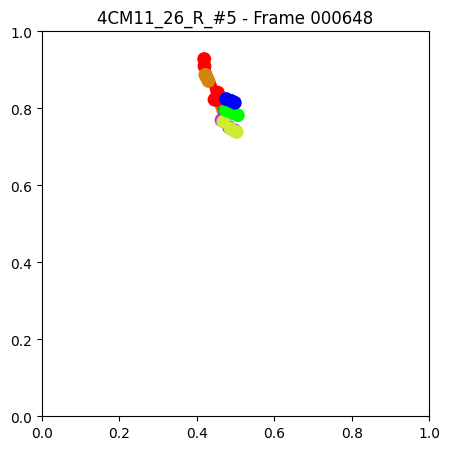

In [3]:
import matplotlib.pyplot as plt
import os
from IPN_Hand_utils.load_data import IPNHandLandmarks
from tqdm import tqdm

#CONSTANTS
INTERPOLATION = 0
CONNECTIONS = [[(0,4), (5,8), (9,12), (13,16), (17,20)], [(0,5), (0,17), (5,9), (9,13), (13,17)]]

SCATTER_COLORS = ["#ff0000","#ff0000","#d68411","#d68411","#d68411","#ff0000","#b134eb","#b134eb","#b134eb","#ff0000","#cfeb34","#cfeb34","#cfeb34","#ff0000","#00ff00","#00ff00","#00ff00","#ff0000","#0000ff","#0000ff","#0000ff"]

SOURCE_DIR = f"../features/IPN_Hand/pose_features_w_interp_b/"
SAVE_DIR = f"../features/IPN_Hand/coordinates_images/temp2/"

LOAD_FULL_VIDEO = True
INFO = ['4CM11_26_R_#5', 'G08', 11, 1150, 1208, 59]

landmarks= IPNHandLandmarks(source=SOURCE_DIR, full_video=LOAD_FULL_VIDEO).get_landmarks(INFO) 

#Plot the landmarks
for i,frame in tqdm(enumerate(landmarks), desc="Plotting"):
    video_name = INFO[0]
    if LOAD_FULL_VIDEO:
        first_frame = 0
    else:
        first_frame = INFO[3]

    frame_real_number = str(first_frame + i).rjust(6,'0')
    x = []
    y = []
    for coordinate in range(0,len(frame),2):
        x.append(frame[coordinate])
        y.append(frame[coordinate+1])

    plt.figure(figsize=(5,5))

    for connection in CONNECTIONS[0]:
        plt.plot(x[connection[0]:connection[1]+1],y[connection[0]:connection[1]+1], zorder=0, linewidth=2)
    for connection in CONNECTIONS[1]:
        plt.plot([x[connection[0]],x[connection[1]]],[y[connection[0]],y[connection[1]]], c="#ff0000", zorder=0, linewidth=2)

    plt.title(f"{video_name} - Frame {frame_real_number}")
    plt.scatter(x,y, c=SCATTER_COLORS, s=20)
    #plt.axis('off')
    plt.xlim(0,1)
    plt.ylim(0,1)
    os.makedirs(SAVE_DIR, exist_ok=True)
    plt.savefig(f"{SAVE_DIR}/{video_name}_{frame_real_number}.png", bbox_inches='tight', pad_inches=0)
    plt.close('all')